In [43]:
#  1. ML_Classification_abalone

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("/Users/gim-yuseong/Desktop/PycharmProjects/2024_3_2/2024_3_2_딥러닝응용/abalone.csv", index_col=0)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [3]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# 'label' 컬럼을 숫자로 변환
df['Sex'] = label_encoder.fit_transform(df['Sex'])

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()
# 'label' 컬럼을 숫자로 변환
df['Sex'] = label_encoder.fit_transform(df['Sex'])

In [4]:
# 데이터 확인
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [5]:
# 컬렴명 확인
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

Text(0.5, 1.0, 'Shell_weight')

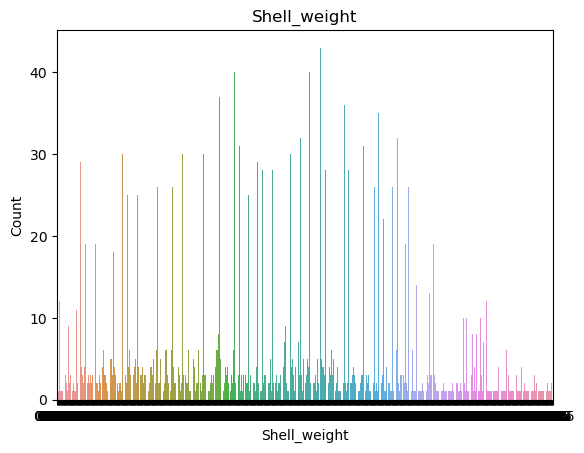

In [7]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="Shell_weight")
plt.xlabel("Shell_weight")
plt.ylabel("Count")
plt.title("Shell_weight")

In [8]:
df['Shell_weight'].value_counts()

0.2750    43
0.2500    42
0.2650    40
0.3150    40
0.1850    40
          ..
0.0060     1
0.6460     1
0.5010     1
0.3295     1
0.0920     1
Name: Shell_weight, Length: 926, dtype: int64

In [9]:
# 결측치 확인
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [10]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

/var/folders/2d/pz01mw0j6xgf58tm1h8b8w5m0000gn/T/ipykernel_51643/1474768853.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Length'], kde = True, hist = False, ax=ax1)
/var/folders/2d/pz01mw0j6xgf58tm1h8b8w5m0000gn/T/ipykernel_51643/1474768853.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

<Axes: xlabel='Diameter', ylabel='Density'>

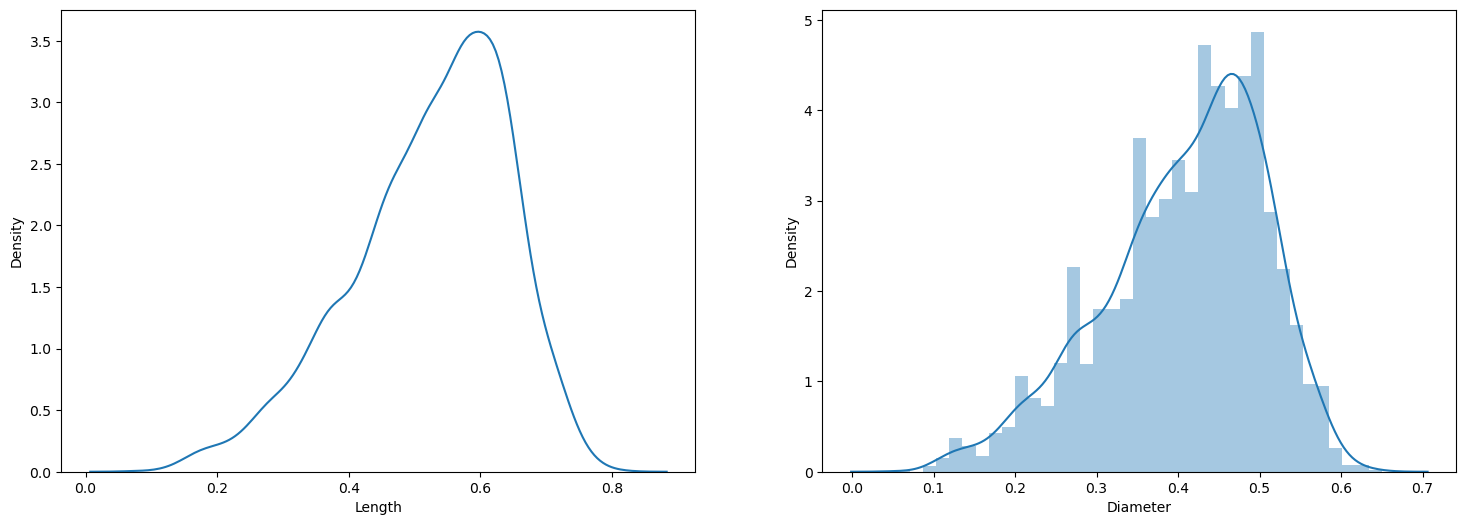

In [11]:
# 컬럼별 히스토그램 확인


figure = plt.figure(figsize=(18,6))
ax1 = plt.subplot(1,2,1)
sns.distplot(df['Length'], kde = True, hist = False, ax=ax1)
ax2 = plt.subplot(1,2,2)
sns.distplot(df['Diameter'], ax=ax2)

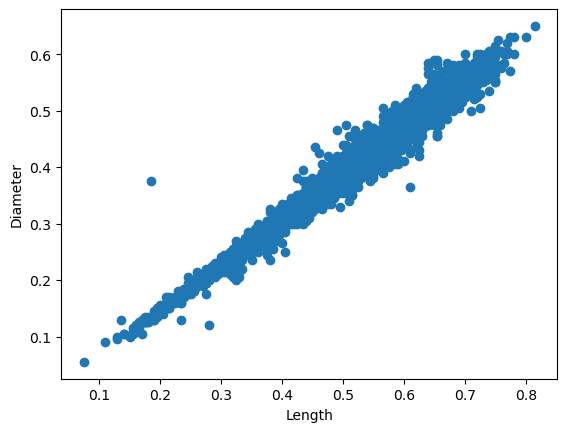

In [12]:
# 산점도 확인

import matplotlib.pyplot as plt
import numpy as np

plt.scatter(df['Length'], df['Diameter'])
plt.xlabel('Length')
plt.ylabel('Diameter')

plt.show()

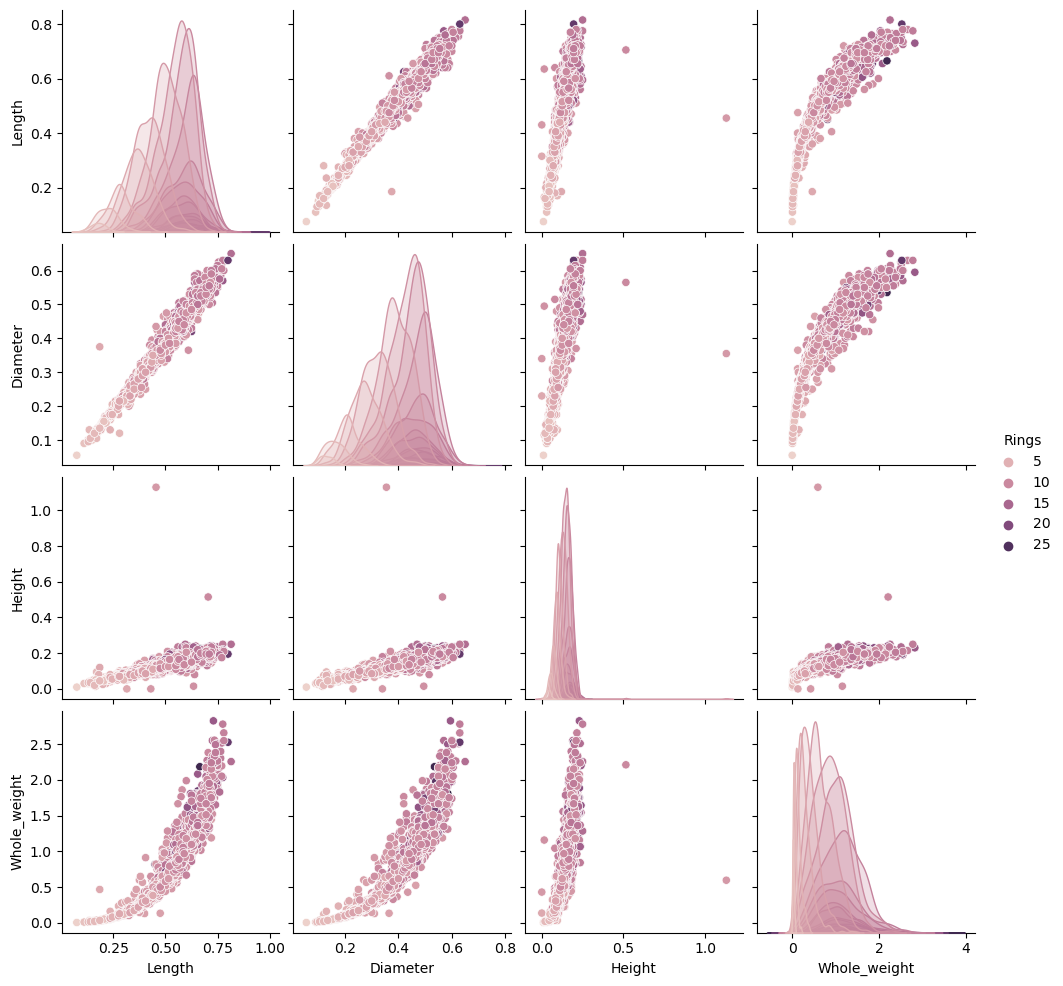

In [13]:
# pairplot를 사용해 각 상관관계 살펴보기

sns.pairplot(df,
             vars=['Length', 'Diameter', 'Height', 'Whole_weight'],
            hue ='Rings')
plt.show()

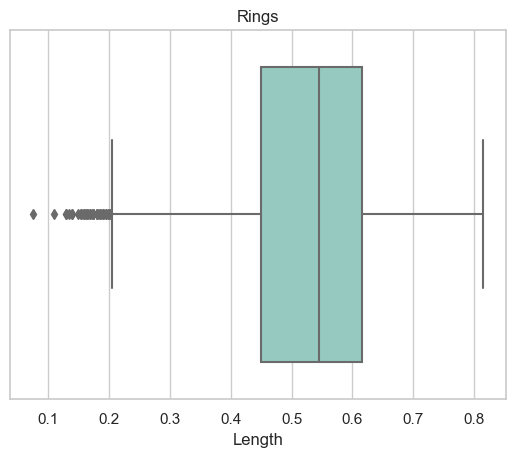

In [14]:
# 특정 칼럼의 범위 확인 및 outlier 확인

sns.set_theme(style="whitegrid")
sns.boxplot(x="Length", data=df, palette="Set3")
plt.title("Rings")
plt.show()

/var/folders/2d/pz01mw0j6xgf58tm1h8b8w5m0000gn/T/ipykernel_51643/2498552643.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


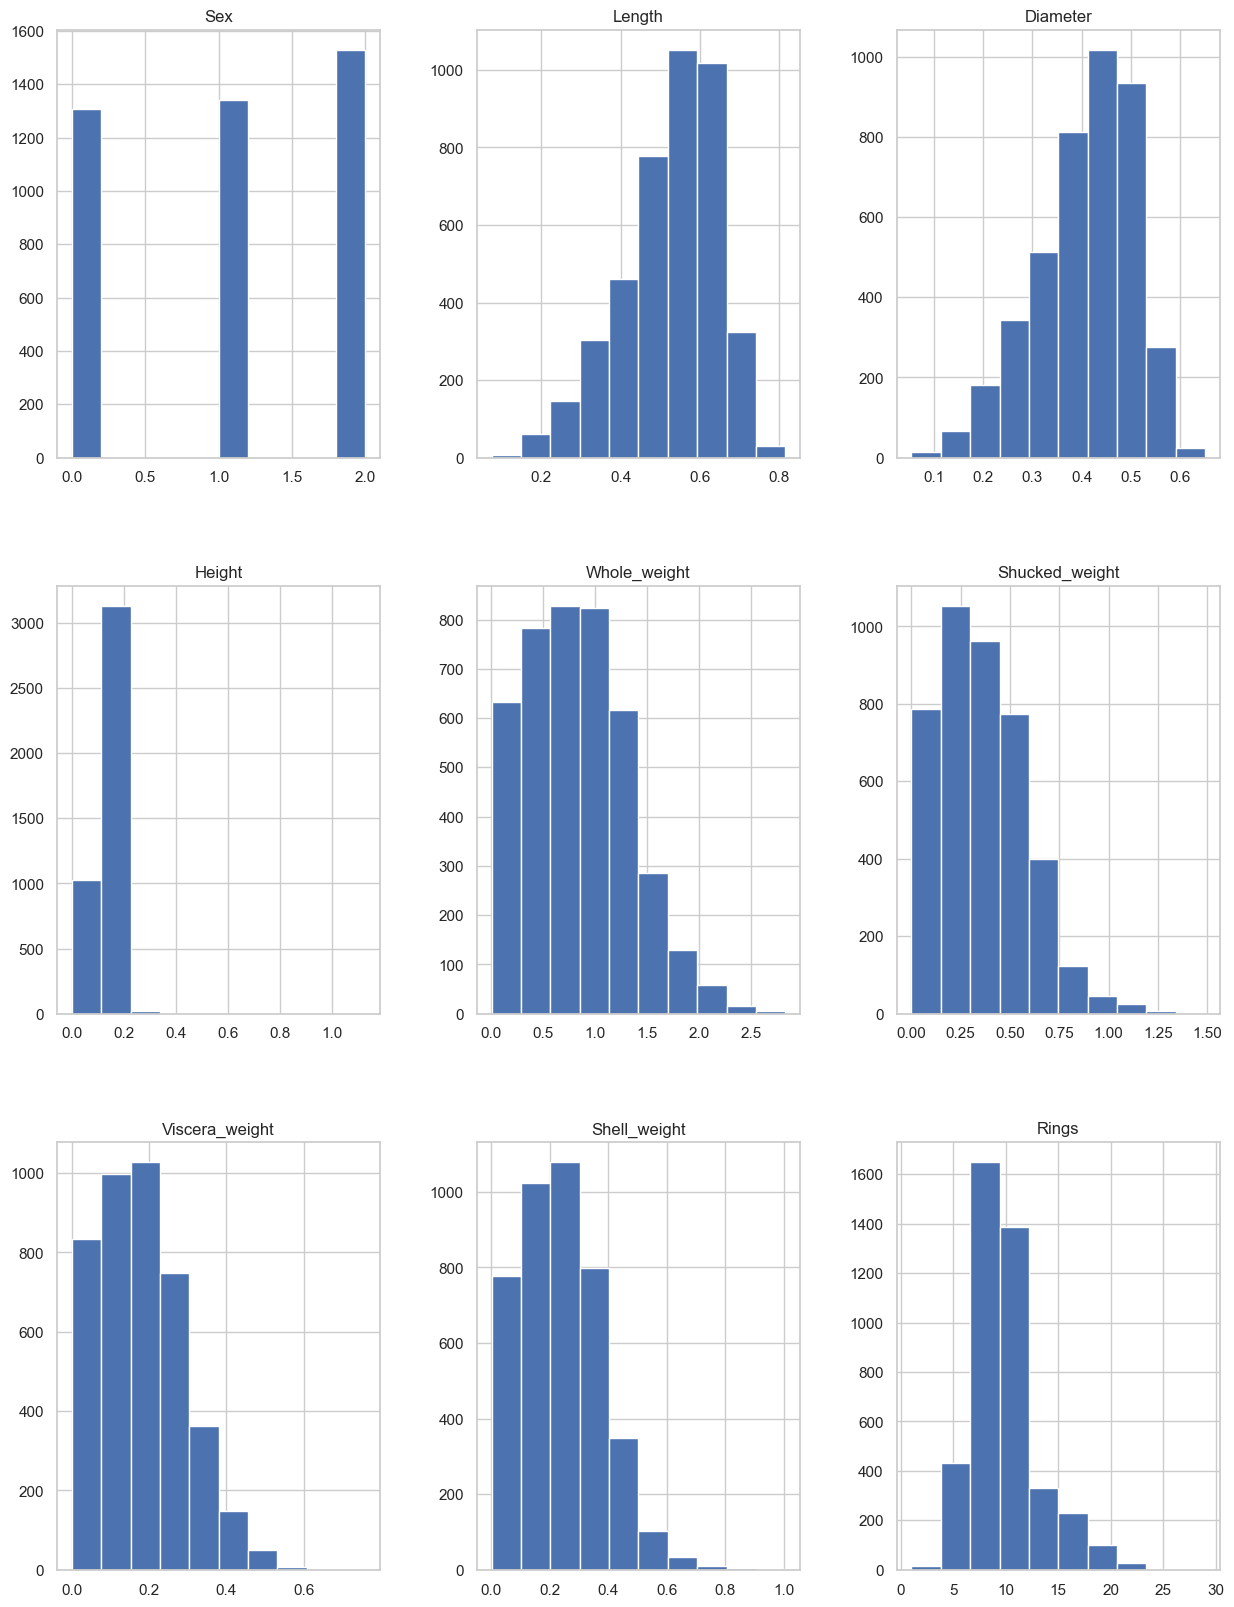

In [15]:
# 각 컬럼별 히스토 그램 확인

fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

In [16]:
X=df.drop('Shell_weight',axis=1)
X.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Rings
id,,,,,,,,
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,7


In [17]:
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [18]:
y=df['Shell_weight']
y.value_counts()

0.2750    43
0.2500    42
0.2650    40
0.3150    40
0.1850    40
          ..
0.0060     1
0.6460     1
0.5010     1
0.3295     1
0.0920     1
Name: Shell_weight, Length: 926, dtype: int64

In [19]:
print ("==================================")
print (" ACCURACY OF OTHER ML CLASSIFIERS" )
print ("==================================")

 ACCURACY OF OTHER ML CLASSIFIERS


In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [30]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# y_train과 y_test의 값을 모두 고려하여 bins 설정
bins = np.linspace(min(min(y_train), min(y_test)), max(max(y_train), max(y_test)), 10)

# y_train과 y_test를 같은 구간으로 범주화
y_train_binned = np.digitize(y_train, bins)
y_test_binned = np.digitize(y_test, bins)

# SVC를 그대로 사용하여 분류
clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train_binned)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test_binned, pred_svm))
print(confusion_matrix(y_test_binned, pred_svm))



--- SVM Classifier ---
0.7052631578947368
[[192  43   0   0   0   0   0   0   0]
 [ 16 230  45   0   0   0   0   0   0]
 [  0  28 253   9   0   0   0   0   0]
 [  0   2  90  62   0   0   0   0   0]
 [  0   0   2  50   0   0   0   0   0]
 [  0   0   0  18   1   0   0   0   0]
 [  0   0   0   2   0   0   0   0   0]
 [  0   0   0   1   0   0   0   0   0]
 [  0   0   0   1   0   0   0   0   0]]


In [35]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC

# y_train과 y_test의 값을 모두 고려하여 bins 설정
bins = np.linspace(min(min(y_train), min(y_test)), max(max(y_train), max(y_test)), 10)

# y_train과 y_test를 같은 구간으로 범주화
y_train_binned = np.digitize(y_train, bins)
y_test_binned = np.digitize(y_test, bins)

# Logistic Regression 모델 생성 및 학습
clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train_binned)

# 테스트 데이터 예측
pred_lr = clf_lr.predict(X_test)

# 결과 출력
print("\n--- Logistic Regression Classifier ---")
print(accuracy_score(y_test_binned, pred_lr))
print(confusion_matrix(y_test_binned, pred_lr))


--- Logistic Regression Classifier ---
0.7444976076555024
[[217  18   0   0   0   0   0   0   0]
 [ 10 242  39   0   0   0   0   0   0]
 [  0  40 232  18   0   0   0   0   0]
 [  0   2  69  78   5   0   0   0   0]
 [  0   0   2  41   9   0   0   0   0]
 [  0   0   0   5  14   0   0   0   0]
 [  0   0   0   0   2   0   0   0   0]
 [  0   0   0   0   1   0   0   0   0]
 [  0   0   0   0   1   0   0   0   0]]


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# y_train과 y_test의 값을 모두 고려하여 bins 설정
bins = np.linspace(min(min(y_train), min(y_test)), max(max(y_train), max(y_test)), 10)

# y_train과 y_test를 같은 구간으로 범주화
y_train_binned = np.digitize(y_train, bins)
y_test_binned = np.digitize(y_test, bins)

# Neural Network 모델 생성 및 학습
clf_nn = MLPClassifier(random_state=0)
clf_nn.fit(X_train, y_train_binned)

# 테스트 데이터 예측
pred_nn = clf_nn.predict(X_test)

# 결과 출력
print("\n--- Neural Network Classifier ---")
print(accuracy_score(y_test_binned, pred_nn))
print(confusion_matrix(y_test_binned, pred_nn))



--- Neural Network Classifier ---
0.7789473684210526
[[220  15   0   0   0   0   0   0   0]
 [  8 245  38   0   0   0   0   0   0]
 [  0  28 236  26   0   0   0   0   0]
 [  0   2  56  85  11   0   0   0   0]
 [  0   0   0  28  23   1   0   0   0]
 [  0   0   0   0  14   5   0   0   0]
 [  0   0   0   0   0   2   0   0   0]
 [  0   0   0   0   0   1   0   0   0]
 [  0   0   0   0   0   1   0   0   0]]


/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [40]:
bins = np.linspace(min(min(y_train), min(y_test)), max(max(y_train), max(y_test)), 10)

# y_train과 y_test를 같은 구간으로 범주화
y_train_binned = np.digitize(y_train, bins)
y_test_binned = np.digitize(y_test, bins)

# Decision Tree 모델 생성 및 학습
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train_binned)

# 테스트 데이터 예측
pred_dt = clf_dt.predict(X_test)

# 결과 출력
print("\n--- Decision Tree Classifier ---")
print(accuracy_score(y_test_binned, pred_dt))
print(confusion_matrix(y_test_binned, pred_dt))


--- Decision Tree Classifier ---
0.7875598086124402
[[222  13   0   0   0   0   0   0   0]
 [ 13 248  29   1   0   0   0   0   0]
 [  0  27 228  35   0   0   0   0   0]
 [  0   5  37  90  20   1   1   0   0]
 [  0   0   0  22  26   4   0   0   0]
 [  0   0   0   0   6   9   4   0   0]
 [  0   0   1   0   0   1   0   0   0]
 [  0   0   0   0   0   1   0   0   0]
 [  0   0   0   0   0   1   0   0   0]]


In [42]:
warnings.filterwarnings('ignore')

# y_train과 y_test의 값을 모두 고려하여 bins 설정
bins = np.linspace(min(min(y_train), min(y_test)), max(max(y_train), max(y_test)), 10)

# y_train과 y_test를 같은 구간으로 범주화
y_train_binned = np.digitize(y_train, bins)
y_test_binned = np.digitize(y_test, bins)

print("\n--- Random Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train_binned)
pred = rf_clf.predict(X_test)

print(accuracy_score(y_test_binned, pred))
print(confusion_matrix(y_test_binned, pred))


--- Random Forest ---
0.8296650717703349
[[219  16   0   0   0   0   0   0   0]
 [  7 255  29   0   0   0   0   0   0]
 [  0  13 252  24   1   0   0   0   0]
 [  0   1  38 104  11   0   0   0   0]
 [  0   0   0  20  30   2   0   0   0]
 [  0   0   0   1   9   7   2   0   0]
 [  0   0   0   1   0   1   0   0   0]
 [  0   0   0   0   0   1   0   0   0]
 [  0   0   0   0   0   1   0   0   0]]


In [44]:
# 2. ML_regression_abalone

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats  # 과학용 계산 라이브러리

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("/Users/gim-yuseong/Desktop/PycharmProjects/2024_3_2/2024_3_2_딥러닝응용/abalone.csv", index_col=0)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [47]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# 'label' 컬럼을 숫자로 변환
df['Sex'] = label_encoder.fit_transform(df['Sex'])

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()
# 'label' 컬럼을 숫자로 변환
df['Sex'] = label_encoder.fit_transform(df['Sex'])

In [48]:
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [53]:
X = df.drop('Sex',axis=1)
X.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [54]:
y = df['Sex']
y.head()

id
0    2
1    2
2    0
3    2
4    1
Name: Sex, dtype: int64

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,
                                                  y,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3341, 8) (3341,)
(836, 8) (836,)


In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
ly_preds = model.predict(X_test)

print('평균제곱근오차', mean_squared_error(ly_preds, y_test))

def mse_np(actual, predicted):
    return np.mean((np.array(actual) - np.array(predicted)) ** 2)

print('평균제곱근오차', mse_np(ly_preds, y_test))

def mse(actual, predicted):
    sum_square_error = sum((a - p) ** 2 for a, p in zip(actual, predicted))
    mean_square_error = sum_square_error / len(actual)
    return mean_square_error

print('평균제곱근오차', mse(ly_preds, y_test))

평균제곱근오차 0.6639312008164623
평균제곱근오차 0.6639312008164623
평균제곱근오차 0.6639312008164617


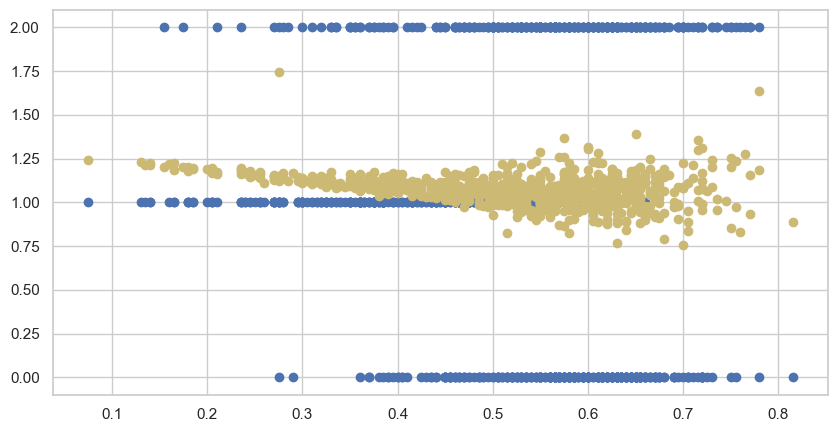

In [57]:
# 예측값과 실제 값 차이를 산접도로 표시, 노란색 예측

plt.figure(figsize=(10,5))
plt.scatter(X_test['Length'], y_test, label='y_test')
plt.scatter(X_test['Length'], ly_preds, c='y', label='ly_preds')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()         

In [58]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

dy_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(dy_preds, y_test))

평균제곱근오차 1.394736842105263


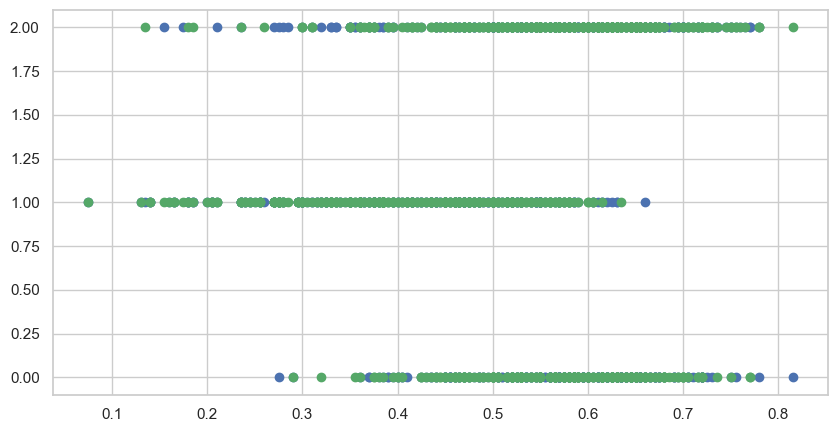

In [59]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Length'], y_test, label='y_test')
plt.scatter(X_test['Length'], dy_preds, c='g', label='dy_preds')
plt.show()

In [60]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 0.7093912679425838


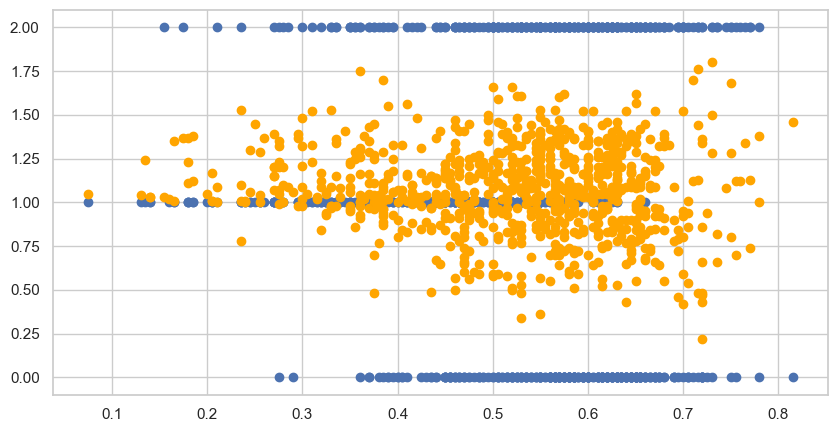

In [61]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Length'], y_test, label='y_test')
plt.scatter(X_test['Length'], ry_preds, c='orange', label='ry_preds')

plt.show()  

In [62]:
from sklearn.svm import SVR

model = SVR(kernel='linear')
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 0.695321249290415


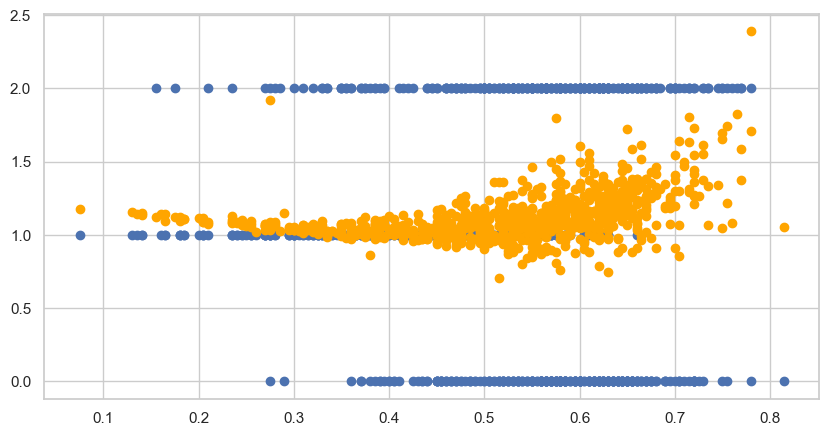

In [63]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Length'], y_test, label='y_test')
plt.scatter(X_test['Length'], ry_preds, c='orange', label='ry_preds')

plt.show()  